<a href="https://colab.research.google.com/github/AmiraOsamaMohamed/Selected2/blob/main/Selected2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from os import listdir
from matplotlib.image import *
from sklearn.model_selection import train_test_split
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.normalization import batch_normalization
from matplotlib.image import imread
import tensorflow as tf
# from tensorflow.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


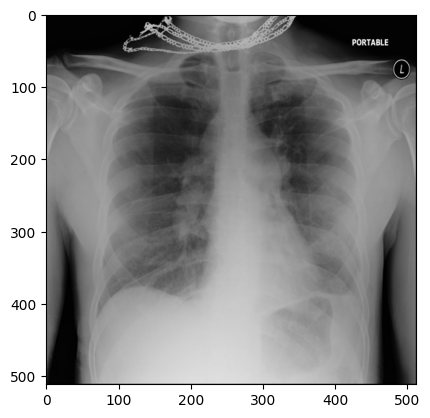

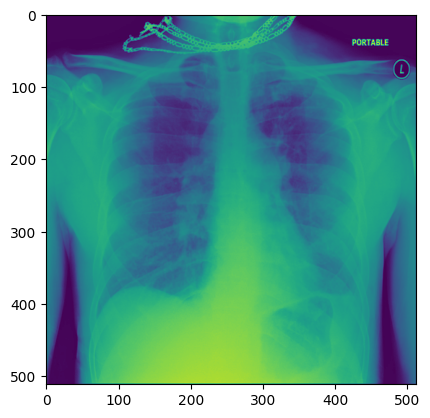

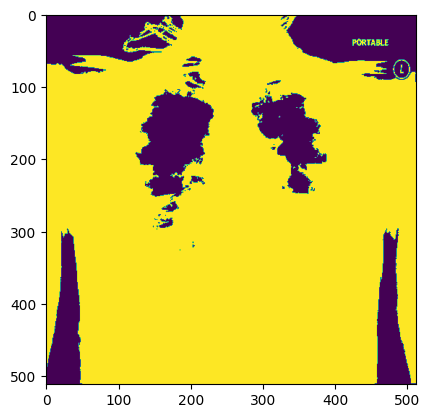

(512, 512)


In [3]:
####data(images) preprocessing########
import matplotlib.pylab as plt
Train_DIR=r'/content/drive/MyDrive/'
Categories=['Normal','Tuberculosis']
for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret,binary_image = cv2.threshold(gray_image,70,255,0)
        plt.imshow(image)
        plt.show()
        plt.imshow(gray_image)
        plt.show()
        plt.imshow(binary_image)
        plt.show()
        print(gray_image.shape)
        break
    break

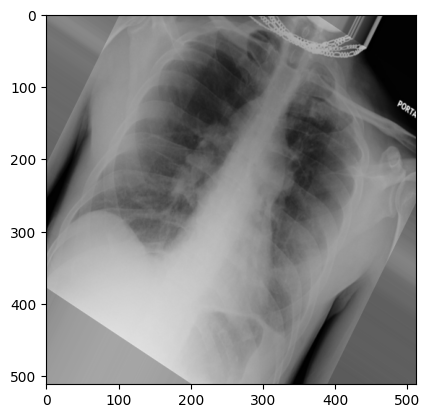

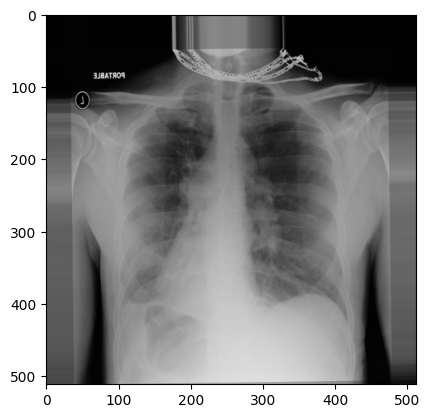

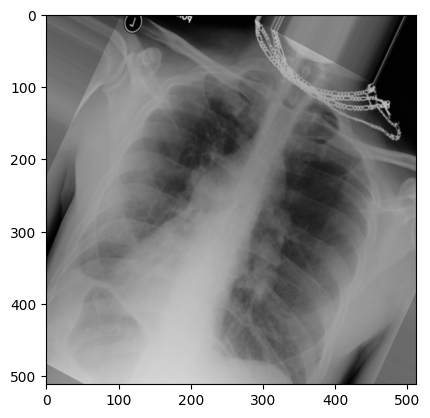

In [4]:
train_datagen = ImageDataGenerator(
           rescale=1./255,
           zoom_range=0.2,
           rotation_range = 30,
           width_shift_range = 0.1,
           horizontal_flip=True)
newImage = image.reshape((1,) + image.shape)
i=0
for batch in train_datagen.flow(newImage, batch_size=1):
        img = np.reshape(batch,(512,512,3))
        plt.imshow(img)
        plt.show()
        i += 1
        if i == 3:
                 break 

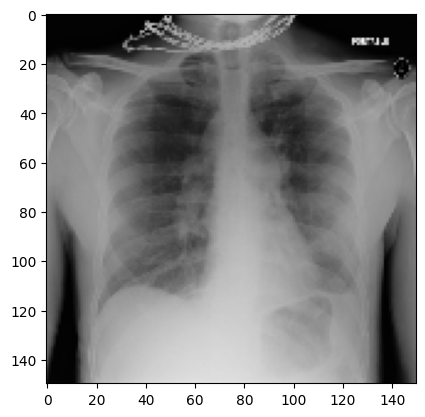

In [5]:
IMG_SIZE=150
new_image=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [6]:
def load_normal_images_and_labels():
    img_lst=[]
    labels=[]
    j=0
    for index in os.listdir('/content/drive/MyDrive/Normal'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/Normal',index))
        #resize image to 150*150
        resized_img =cv2.resize(img,(150,150))
         # convert image to gray
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # convert image to binary image
        ret,binary_img = cv2.threshold(gray_img,70,255,0)
        img_lst.append(binary_img)
        labels.append('Normal')
        j+=1
        
    return img_lst, labels
images1, labels1 = load_normal_images_and_labels()
print("No. of images loaded = ",len(images1),"\nNo. of labels loaded = ",len(labels1))
print(type(images1),type(labels1))

No. of images loaded =  3500 
No. of labels loaded =  3500
<class 'list'> <class 'list'>


In [7]:
def load_tuberculosis_images_and_labels():
    img_lst=[]
    labels=[]
    newImages=[]
    j=0
    for index in os.listdir('/content/drive/MyDrive/Tuberculosis'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/Tuberculosis',index))
        #resize image to 150*150
        resized_img = cv2.resize(img,(150,150))
        lab = resized_img.reshape((1,) + resized_img.shape)
        i=0
        for batch in train_datagen.flow(lab, batch_size=1):
                 reshapedImage = np.reshape(batch,(150,150,3))
                 gray_img = cv2.cvtColor(reshapedImage, cv2.COLOR_BGR2GRAY)
                 ret,binary_img = cv2.threshold(gray_img,70,255,0)
                 newImages.append(binary_img)
                 labels.append('Tuberculosis')
                 i += 1
                 if i == 3:
                           break 
        #######################
        #######################
        # convert image to gray
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # convert image to binary image 
        ret,binary_img = cv2.threshold(gray_img,70,255,0)
        img_lst.append(binary_img)
        labels.append('Tuberculosis')
        j+=1
      
    return img_lst, labels,newImages
images2, labels2 ,newImages = load_tuberculosis_images_and_labels()
print("No. of images loaded = ",len(images2),"\nNo. of new images loaded = ",len(newImages),"\nNo. of labels loaded = ",len(labels2))
print(type(images2),type(labels2))

No. of images loaded =  709 
No. of new images loaded =  2127 
No. of labels loaded =  2836
<class 'list'> <class 'list'>


In [8]:
images=images1+images2+newImages
labels=labels1+labels2
images =np.array(images)
labels =np.array(labels)
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (6336, 150, 150) 
Labels shape =  (6336,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
from sklearn.utils import shuffle
def shuffle_in_unison(a,b):
    assert len(a)==len(b)
    shuffled_a=np.empty(a.shape,dtype=a.dtype)
    shuffled_b=np.empty(b.shape,dtype=b.dtype)
    permutation=np.random.permutation(len(a))
    for old_index,new_index in enumerate(permutation):
      shuffled_a[new_index]=a[old_index]
      shuffled_b[new_index]=b[old_index]
    return   shuffled_a,shuffled_b
shuffled_a,shuffled_b=shuffle_in_unison(images,labels)

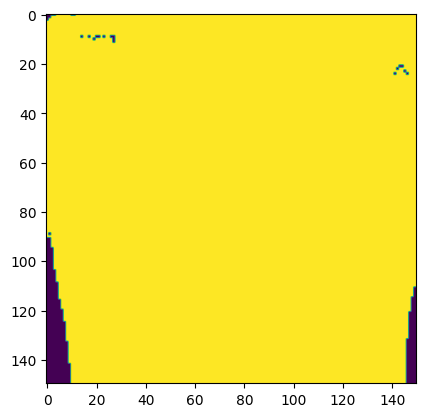

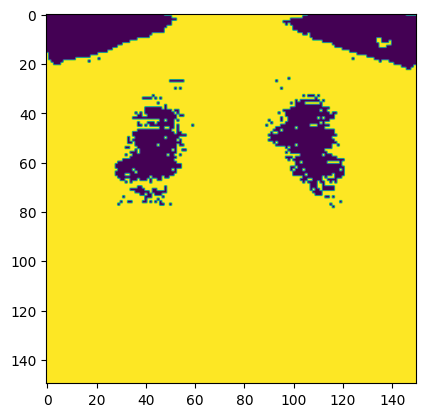

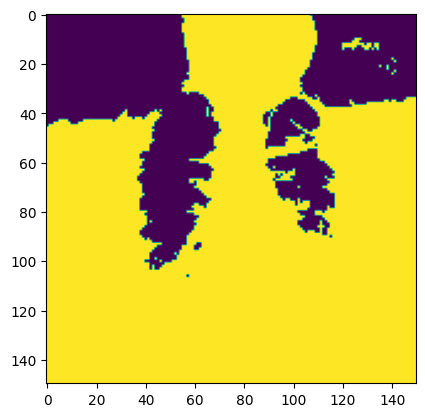

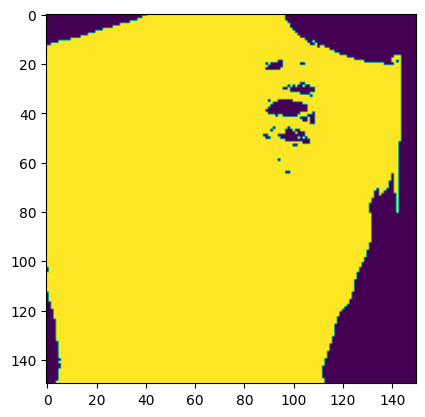

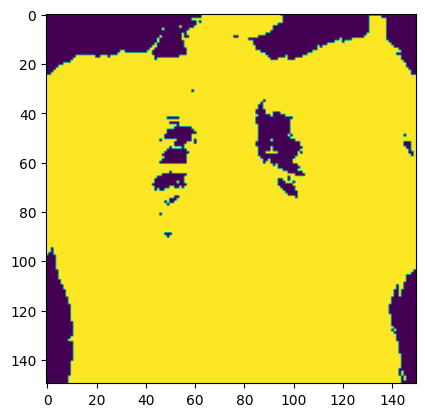

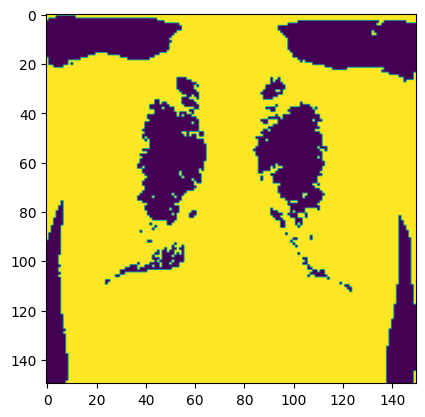

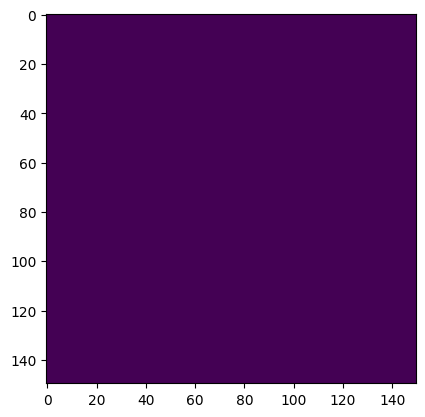

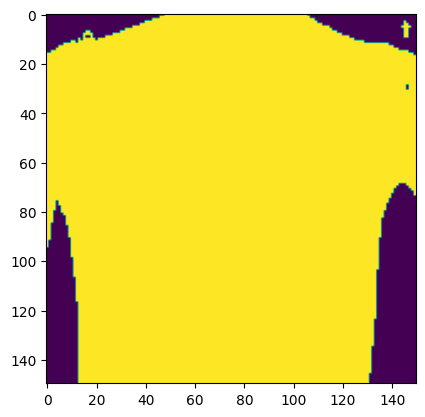

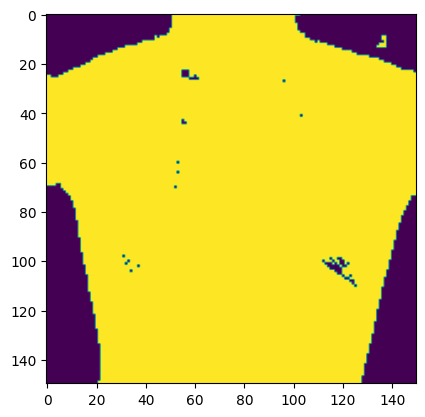

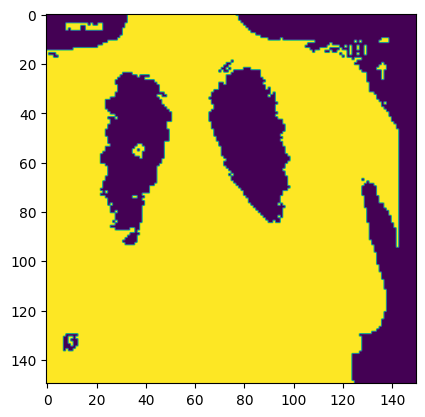

Normal
Normal
Normal
Normal
Normal
Normal
Tuberculosis
Normal
Normal
Normal
6336
6336
(6336, 150, 150)
(6336,)


In [10]:
k=0
for i in shuffled_a:
   plt.imshow(i)
   plt.show()
   k+=1
   if k==10:
           break
k=0
for i in shuffled_b:
   print(i)
   k+=1
   if k==10:
           break  
print(len(shuffled_a))   
print(len(shuffled_b))    
print(shuffled_a.shape)   
print(shuffled_b.shape)            

In [104]:
#convert catoregal data into numerical 
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
Y_train= lb.fit_transform(shuffled_b)
X_train= shuffled_a


In [105]:
# label 0==>normal     1==>Tuberculosis
#######spliting data########
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=42)
print(X_train.shape, x_train.shape, x_test.shape,x_val.shape)


(6336, 150, 150) (3547, 150, 150) (1268, 150, 150) (1521, 150, 150)


In [108]:
####scale of each feature###
X_train_scaled = x_train/255
X_test_scaled = x_test/255
X_val_scaled=x_val/255
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_val_scaled.shape)
print(y_train.shape)

(3547, 150, 150)
(1268, 150, 150)
(1521, 150, 150)
(3547,)


In [109]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import MaxPooling2D, Conv2D

In [174]:
#building cnn model
cnn_model = Sequential()
cnn_model.add(Conv2D(16,1,padding="same", activation="relu", input_shape=(150,150,1)))
cnn_model.add(MaxPooling2D(padding="same"))

cnn_model.add(Conv2D(32, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))
cnn_model.add(MaxPooling2D(padding="same"))

cnn_model.add(Conv2D(64,1,padding="same", activation="relu"))
cnn_model.add(MaxPooling2D(padding="same"))

cnn_model.add(Conv2D(128, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))

cnn_model.add(MaxPooling2D(padding="same"))
cnn_model.add(Conv2D(256, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))

cnn_model.add(MaxPooling2D(padding="same"))
cnn_model.add(Conv2D(512, 1, padding="same", activation="relu"))
cnn_model.add(Dropout(0.5))

cnn_model.add(MaxPooling2D(padding="same"))
cnn_model.add(Flatten())
#model.add(Dense(128,activation="relu"))
#model.add(Dense(2, activation="softmax"))

cnn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 150, 150, 16)      32        
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 75, 75, 32)        544       
                                                                 
 dropout_38 (Dropout)        (None, 75, 75, 32)        0         
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 38, 38, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 38, 38, 64)       

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [112]:
cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
cnn_model.fit(X_train_scaled,y_train , epochs=40)

Epoch 1/40
111/111 [==============================] - 33s 285ms/step - loss: 3.3466 - accuracy: 0.2278
Epoch 2/40
111/111 [==============================] - 33s 293ms/step - loss: 2.5766 - accuracy: 0.2893
Epoch 3/40
111/111 [==============================] - 31s 284ms/step - loss: 2.4897 - accuracy: 0.3005
Epoch 4/40
111/111 [==============================] - 33s 297ms/step - loss: 2.2858 - accuracy: 0.3259
Epoch 5/40
111/111 [==============================] - 32s 286ms/step - loss: 2.4054 - accuracy: 0.3206
Epoch 6/40
111/111 [==============================] - 33s 297ms/step - loss: 2.3083 - accuracy: 0.3225
Epoch 7/40
111/111 [==============================] - 31s 284ms/step - loss: 2.3814 - accuracy: 0.3098
Epoch 8/40
111/111 [==============================] - 33s 295ms/step - loss: 2.2943 - accuracy: 0.3344
Epoch 9/40
111/111 [==============================] - 31s 283ms/step - loss: 2.3315 - accuracy: 0.3273
Epoch 10/40
111/111 [==============================] - 32s 288ms/step - l

In [113]:

# Extract feature maps from the flattened layer of the CNN model
features_train = cnn_model.predict(x_train)
features_test = cnn_model.predict(x_test)

40/40 [==============================] - 2s 47ms/step


In [165]:
knn.fit(features_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [166]:
# Evaluate the combination system
score = knn.score(features_test, y_test)
y_pred = knn.predict(features_test)
print("Accuracy: %.2f%%" % (score*100))

Accuracy: 90.14%


In [167]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
cm = confusion_matrix(y_test, y_pred)

In [168]:
# Calculating accuracy, precision, recall and f1-score
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
precision = cm[1][1] / (cm[1][1] + cm[0][1])    # Also called Positive Predictive Value
recall = cm[1][1] / (cm[1][1] + cm[1][0])    # Also called Sensitivity, Hit Rate or True Positive Rate
f1_score = 2 * ((precision * recall) / (precision + recall))

In [169]:
# Printing the performance metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_score)

Accuracy: 0.9014195583596214
Precision: 0.9678111587982833
Recall: 0.803921568627451
F1-Score: 0.8782862706913339


In [170]:
# Printing the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       707
           1       0.97      0.80      0.88       561

    accuracy                           0.90      1268
   macro avg       0.92      0.89      0.90      1268
weighted avg       0.91      0.90      0.90      1268

